In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe


# eagerly (declared only once)
tf.enable_eager_execution(device_policy=tfe.DEVICE_PLACEMENT_SILENT)


In [2]:
from preprocess import prerprocess_train, prerprocess_test

In [3]:
X_train, y_train = prerprocess_train("../data/cifar-10-batches-py/")
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000,))

In [4]:
X_test, y_test = prerprocess_test("../data/cifar-10-batches-py/")
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000,))

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


In [6]:
import pickle
with open("../data/cifar-10-batches-py/batches.meta", "rb") as f:
    label_dict = pickle.load(f)

automobile


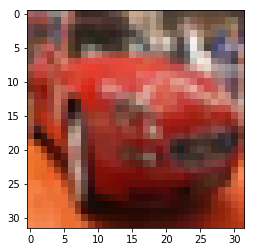

In [7]:
plt.imshow(X_train[5])
print(label_dict['label_names'][y_train[5]])

horse


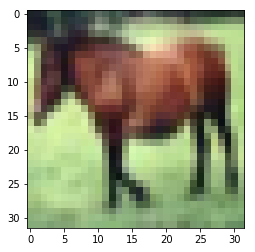

In [8]:
plt.imshow(X_train[7])
print(label_dict['label_names'][y_train[7]])

In [9]:
from alexnet import Alexnet

In [10]:
alex_model = Alexnet(device_name="gpu:0")

In [11]:
alex_model(tf.convert_to_tensor(X_train[:1]), True)
alex_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            multiple                  1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  19248     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  31176     
_________________________________________________________________
conv2d_4 (Conv2D)            multiple                  46728     
_________________________________________________________________
conv2d_5 (Conv2D)            multiple                  31152     
__________

In [12]:
%%time
alex_model.fit(X_train, y_train, X_test, y_test, epochs=10, verbose=1, batch_size=128, tqdm_option="normal")

GLOBAL 1: 100%|██████████| 79/79 [00:10<00:00,  7.76it/s]


[EPOCH 1 / STEP 1]
TRAIN loss   : 1.6413
VAL   loss   : 1.3394
VAL   acc    : 51.0500%


GLOBAL 2: 100%|██████████| 79/79 [00:10<00:00,  7.68it/s]


[EPOCH 2 / STEP 2]
TRAIN loss   : 1.2341
VAL   loss   : 1.1430
VAL   acc    : 59.1800%


GLOBAL 3: 100%|██████████| 79/79 [00:10<00:00,  7.65it/s]


[EPOCH 3 / STEP 3]
TRAIN loss   : 1.0546
VAL   loss   : 1.0357
VAL   acc    : 63.6600%


GLOBAL 4: 100%|██████████| 79/79 [00:10<00:00,  7.57it/s]


[EPOCH 4 / STEP 4]
TRAIN loss   : 0.9344
VAL   loss   : 0.9691
VAL   acc    : 65.7800%


GLOBAL 5: 100%|██████████| 79/79 [00:10<00:00,  1.12it/s]


[EPOCH 5 / STEP 5]
TRAIN loss   : 0.8413
VAL   loss   : 0.9005
VAL   acc    : 68.4300%


GLOBAL 6: 100%|██████████| 79/79 [00:10<00:00,  7.57it/s]


[EPOCH 6 / STEP 6]
TRAIN loss   : 0.7664
VAL   loss   : 0.8621
VAL   acc    : 69.5900%


GLOBAL 7: 100%|██████████| 79/79 [00:10<00:00,  7.58it/s]


[EPOCH 7 / STEP 7]
TRAIN loss   : 0.7086
VAL   loss   : 0.8118
VAL   acc    : 72.0000%


GLOBAL 8: 100%|██████████| 79/79 [00:10<00:00,  7.82it/s]


[EPOCH 8 / STEP 8]
TRAIN loss   : 0.6482
VAL   loss   : 0.8651
VAL   acc    : 70.7700%


GLOBAL 9: 100%|██████████| 79/79 [00:10<00:00,  7.68it/s]


[EPOCH 9 / STEP 9]
TRAIN loss   : 0.6012
VAL   loss   : 0.8148
VAL   acc    : 72.4200%


GLOBAL 10: 100%|██████████| 79/79 [00:10<00:00,  7.67it/s]


[EPOCH 10 / STEP 10]
TRAIN loss   : 0.5658
VAL   loss   : 0.8008
VAL   acc    : 72.6500%
CPU times: user 2min 18s, sys: 1min 53s, total: 4min 12s
Wall time: 4min 39s
